In [1]:
import tensorflow as tf
from keras.applications import MobileNet
import pathlib
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input,Dense, Flatten
from keras.models import Model
import matplotlib.pyplot as plt

2023-06-17 14:49:04.710704: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-17 14:49:04.737566: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-17 14:49:04.738076: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 14:49:05.387382: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
input_shape = [224, 224]

In [3]:
train_path = '/home/user/Documents/augmanted_data/train'
val_path = '/home/user/Documents/augmanted_data/test'

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [5]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical',)

Found 5135 images belonging to 10 classes.


In [6]:
val_set = train_datagen.flow_from_directory(val_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical',)

Found 657 images belonging to 10 classes.


In [7]:
base_model = MobileNet(input_shape=input_shape + [3], weights='imagenet', include_top=False)

2023-06-17 14:49:07.650197: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-17 14:49:07.650492: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(10, activation='softmax')(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [9]:
base_model.trainable = False

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)

In [12]:
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics="accuracy")

In [13]:
train_network = model.fit(training_set, epochs=20, validation_data=training_set)

Epoch 1/20


2023-06-17 14:49:08.678797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


81/81 [==============================] - ETA: 0s - loss: 6.2222 - accuracy: 0.7574

2023-06-17 14:50:29.746299: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


81/81 [==============================] - 166s 2s/step - loss: 6.2222 - accuracy: 0.7574 - val_loss: 0.2979 - val_accuracy: 0.9482
Epoch 2/20
81/81 [==============================] - 167s 2s/step - loss: 0.2194 - accuracy: 0.9564 - val_loss: 0.2323 - val_accuracy: 0.9575
Epoch 3/20
81/81 [==============================] - 164s 2s/step - loss: 0.2670 - accuracy: 0.9527 - val_loss: 0.1279 - val_accuracy: 0.9753
Epoch 4/20
81/81 [==============================] - 161s 2s/step - loss: 0.2241 - accuracy: 0.9612 - val_loss: 0.1472 - val_accuracy: 0.9737
Epoch 5/20
81/81 [==============================] - 159s 2s/step - loss: 0.1663 - accuracy: 0.9696 - val_loss: 0.2022 - val_accuracy: 0.9681
Epoch 6/20
81/81 [==============================] - 159s 2s/step - loss: 0.2012 - accuracy: 0.9692 - val_loss: 0.0674 - val_accuracy: 0.9858
Epoch 7/20
81/81 [==============================] - 160s 2s/step - loss: 0.2113 - accuracy: 0.9723 - val_loss: 0.3437 - val_accuracy: 0.9556
Epoch 8/20
81/81 [======

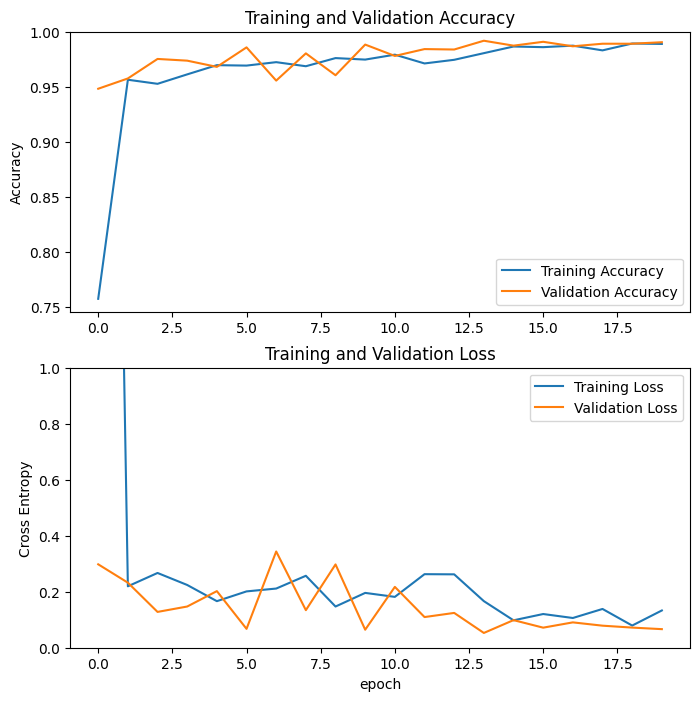

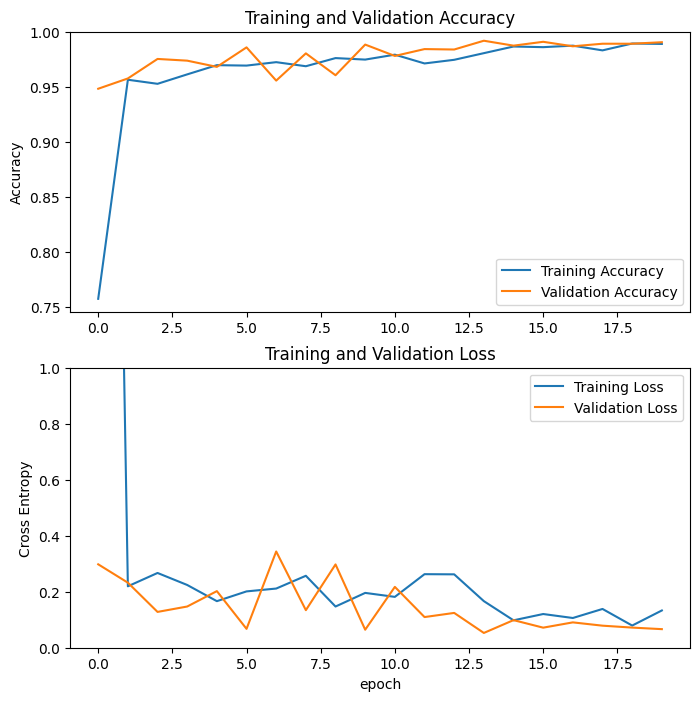

In [15]:
acc = train_network.history['accuracy']
val_acc = train_network.history['val_accuracy']

loss = train_network.history['loss']
val_loss = train_network.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [16]:
# base_model.trainable = True

In [17]:
# model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics="accuracy")

In [20]:
# train_network = model.fit(training_set, epochs=10, validation_data=training_set)

In [21]:
# acc = train_network.history['accuracy']
# val_acc = train_network.history['val_accuracy']
#
# loss = train_network.history['loss']
# val_loss = train_network.history['val_loss']
#
# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
# plt.title('Training and Validation Accuracy')
#
# plt.subplot(2, 1, 2)
# plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
# plt.title('Training and Validation Loss')
# plt.xlabel('epoch')
# plt.show()

In [11]:
test_path = '/home/user/Documents/pordz'

In [12]:
test_data = train_datagen.flow_from_directory(test_path,
                                              target_size = (224, 224),
                                              batch_size = 64,
                                              class_mode = 'categorical')

Found 80 images belonging to 10 classes.


In [13]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics="accuracy")

In [14]:
net = model.fit(test_data, epochs=15)

Epoch 1/15


2023-06-17 14:36:04.074655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 2s 1s/step - loss: 3.4334 - accuracy: 0.0375
Epoch 2/15
2/2 [==============================] - 2s 112ms/step - loss: 2.9830 - accuracy: 0.0750
Epoch 3/15
2/2 [==============================] - 1s 111ms/step - loss: 2.4585 - accuracy: 0.2000
Epoch 4/15
2/2 [==============================] - 1s 1s/step - loss: 2.1453 - accuracy: 0.2750
Epoch 5/15
2/2 [==============================] - 2s 1s/step - loss: 1.9992 - accuracy: 0.3250
Epoch 6/15
2/2 [==============================] - 2s 100ms/step - loss: 1.7555 - accuracy: 0.4125
Epoch 7/15
2/2 [==============================] - 1s 1s/step - loss: 1.5228 - accuracy: 0.5125
Epoch 8/15
2/2 [==============================] - 2s 1s/step - loss: 1.2616 - accuracy: 0.5750
Epoch 9/15
2/2 [==============================] - 2s 1s/step - loss: 1.1521 - accuracy: 0.7375
Epoch 10/15
2/2 [==============================] - 2s 1s/step - loss: 0.9107 - accuracy: 0.8000
Epoch 11/15
2/2 [==============================] - 

In [ ]:
acc = net.history['accuracy']
loss = net.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()